In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import confusion_matrix
import sklearn
import importlib.util
import pickle

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Template", "/home/admin1/PycharmProjects/ML/Week10/Template/template.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
temp = foo.Template()

In [3]:
# read file
df=temp.read_file('test_data.csv')
df.head()

,Age,EstimatedSalary,Purchased
0,46,23000,1
1,24,58000,0
2,26,118000,0
3,23,63000,0
4,37,144000,1


In [4]:
# separating features and labels of training dataset
x_test=df.iloc[:,[0,1]].values
y_test=df.iloc[:,2].values


In [5]:
# reading the pickle file
fileObject = open('train_data.pkl','rb')

classifier = pickle.load(fileObject)
sc=pickle.load(fileObject)



In [6]:
# feature scaling
x_test=sc.transform(x_test)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Test matrix
 [[54 24]
 [ 7 35]]
Accuracy of test data = 76.28205128205127


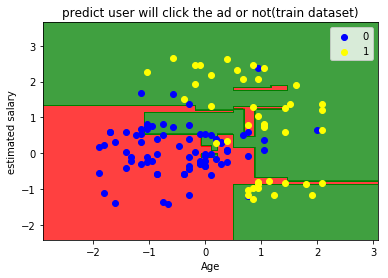

In [7]:
class DecisionTree:
    
    def get_predictions(self,x):        
        # getting prediction values
        y_pred = classifier.predict(x)
        return y_pred
    
    def create_confusion_matrix(self,y,y_pred):
        # making confusion matrix
        cm= confusion_matrix(y,y_pred)
        return cm
    
    def get_accuracy(self,y_train,y_pred):
        Accuracy = sklearn.metrics.balanced_accuracy_score(y_train,y_pred)*100
        return Accuracy
                
def main():
    # creates class object 
    obj = DecisionTree()
    y_pred_test = obj.get_predictions(x_test)
    
    cm=obj.create_confusion_matrix(y_test,y_pred_test)
    print("Test matrix\n",cm)
    
    acc_test = obj.get_accuracy(y_test,y_pred_test)
    print("Accuracy of test data =",acc_test)
    
    temp.visualization(y_pred_test,x_test,y_test,classifier)
    
if __name__ == '__main__':
    main()